# Directional Wells Trayectories

# Import Python Libraries

In [1]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [4]:
Well_file = "Data/input/F-15/1.xml"
with open(Well_file) as file:
    data = file.read()

# Data Processing

In [44]:
data_xml = BeautifulSoup(data, 'html.parser')
params = set([str(tag.name) for tag in data_xml.find_all()])

In [12]:
# Crear lista vacia
params = []
for tag in data_xml.find_all():
    params.append(str(tag.name))
    
len(params)

2257

In [16]:
params = set(params)
print(params)

{'dtimlastchange', 'servicecompany', 'azivertsect', 'trajectory', 'namewell', 'priv_ipowner', 'dispew', 'priv_userlastchange', 'priv_customdata', 'magdeclused', 'commondata', 'priv_dtimreceived', 'rateturn', 'priv_userowner', 'vertsect', 'priv_iplastchange', 'azi', 'dtimtrajstart', 'sourcename', 'dls', 'mdmx', 'mdmn', 'namewellbore', 'trajectorys', 'ratebuild', 'dispewvertsectorig', 'incl', 'dtimstn', 'dtimtrajend', 'dispnsvertsectorig', 'md', 'dispns', 'trajectorystation', 'tvddelta', 'aziref', 'dtimcreation', 'itemstate', 'typetrajstation', 'typesurveytool', 'tvd', 'mddelta', 'statustrajstation', 'gridcorused', 'name'}


In [19]:
incl = data_xml.find_all('incl')
incl

[<incl uom="rad">0</incl>,
 <incl uom="rad">0</incl>,
 <incl uom="rad">0.00261799398216206</incl>,
 <incl uom="rad">0.00488692192665297</incl>,
 <incl uom="rad">0.0136135676669454</incl>,
 <incl uom="rad">0.0254818077462783</incl>,
 <incl uom="rad">0.0595157289942365</incl>,
 <incl uom="rad">0.0895353926294966</incl>,
 <incl uom="rad">0.0963421743823747</incl>,
 <incl uom="rad">0.0980875019699873</incl>,
 <incl uom="rad">0.108035881702946</incl>,
 <incl uom="rad">0.122696650083649</incl>,
 <incl uom="rad">0.135088480116887</incl>,
 <incl uom="rad">0.148178449507548</incl>,
 <incl uom="rad">0.156032427812994</incl>,
 <incl uom="rad">0.163013754808201</incl>,
 <incl uom="rad">0.178372654223948</incl>,
 <incl uom="rad">0.207519654065402</incl>,
 <incl uom="rad">0.238761047011991</incl>,
 <incl uom="rad">0.264242854758269</incl>,
 <incl uom="rad">0.239459178047036</incl>,
 <incl uom="rad">0.253596335667887</incl>,
 <incl uom="rad">0.288153863514507</incl>,
 <incl uom="rad">0.28501226553442

In [28]:
float(incl[2].text)

0.00261799398216206

In [37]:
float(data_xml.find_all("azi")[0].text)

0.0

In [40]:
# Nombres de las columnas del Dataframe
columns = ['azi', 'incl', 'md', 'tvd', 'dispns', 'dispew']

# Crear un dataframe vacio
df = pd.DataFrame()

for col in columns:
    df[col] = [float(data.text) for data in data_xml.find_all(col)]      

In [41]:
df

,azi,incl,md,tvd,dispns,dispew
0,0.000000,0.000000,0.000000,0.000000,-3.170000,3.530000
1,0.000000,0.000000,145.899994,145.899994,-3.170000,3.530000
2,4.427726,0.002618,153.399994,153.399985,-3.172757,3.520578
3,2.548530,0.004887,234.199997,234.199627,-3.366177,3.529412
4,2.377313,0.013614,274.600006,274.597786,-3.646544,3.774881
...,...,...,...,...,...,...
75,4.469265,0.382925,3118.280029,2938.419040,-699.230295,-217.451880
76,4.471534,0.390081,3158.540039,2975.709107,-702.866857,-232.185777
77,4.470487,0.371232,3199.020020,3013.291014,-706.461696,-246.789120
78,4.460363,0.366170,3211.780029,3025.193506,-707.585751,-251.248326


## Importar data del pozo F-1C

In [48]:
# 1.Leer el archivo

well_file_F1C = "Data/input/F-1 C/1.xml"

with open(well_file_F1C) as F1: # Utiliza para leer archivos de todo tipo
    data_F1 = F1.read()

In [53]:
# 2. Procesar el archivo (Beautiful soup)

dataF1_xml = BeautifulSoup(data_F1, "html.parser")
float(data_xml.find_all("tvddelta")[0].text)

-2898.17300897067

In [54]:
# 3. Construir dataframe del pozo F1

# Nombres de las columnas del Dataframe
columnas = ['azi', 'incl', 'md', 'tvd', 'dispns', 'dispew']

# Crerar dataframe vacio
df_F1 = pd.DataFrame()

# LLenar el dataframe con un bucle for
for cols in columnas:
    df_F1[cols] = [float(vals.text) for vals in dataF1_xml.find_all(cols)]
df_F1

,azi,incl,md,tvd,dispns,dispew
0,0.000000,0.000000,0.000000,0.000000,3.170000,-3.530000
1,0.000000,0.000000,210.699997,210.699997,3.170000,-3.530000
2,5.275083,0.032114,237.600006,237.595383,3.400403,-3.895308
3,5.318018,0.033336,251.100006,251.088156,3.644096,-4.263587
4,5.336519,0.043110,264.899994,264.878010,3.948795,-4.693964
...,...,...,...,...,...,...
85,0.930959,0.146084,3292.200000,3087.733117,719.307958,389.952176
86,0.998677,0.078540,3332.300000,3127.573073,721.903240,393.617445
87,0.918916,0.075747,3372.800000,3167.952736,723.693135,396.171430
88,0.985238,0.075224,3413.200000,3208.237774,725.459525,398.651792


## Dataframe para todos los pozos

In [ ]:
"Data/input/F-1 C/1.xml"

In [55]:
# Establecer rutas de los archivos
wells = ['F-1 C',
        'F-4',
        'F-5',
        'F-7',
        'F-9',
        'F-11',
        'F-12',
        'F-14',
        'F-15']

preffix = "Data/input/"
suffix = "/1.xml"

# Crear un dataframe vacio
df_all_wells = pd.DataFrame()

# LLenar el dataframe con un bucle for
for well in wells:
    # Crear un diccionario vacio interno
    df = pd.DataFrame()
    
    # LLamar a la ruta de los archivos
    files = preffix + well + suffix
    
    # LLamar a cada archivo
    with open(files) as f:
        data = f.read()
        
    # Procesar cada archivo con Beautiful soup    
    data_xml = BeautifulSoup(data, 'html.parser')
    
    # LLenar el dataframe vacio interno
    for col in columns:
        df[col] = [float(x.text) for x in data_xml.find_all(col)]
        
    # Agregar columna que represente a cada pozo
    df['Well'] = well
    df_all_wells = pd.concat([df_all_wells, df], ignore_index=True)

In [56]:
df_all_wells

,azi,incl,md,tvd,dispns,dispew,Well
0,0.000000,0.000000,0.000000,0.000000,3.170000,-3.530000,F-1 C
1,0.000000,0.000000,210.699997,210.699997,3.170000,-3.530000,F-1 C
2,5.275083,0.032114,237.600006,237.595383,3.400403,-3.895308,F-1 C
3,5.318018,0.033336,251.100006,251.088156,3.644096,-4.263587,F-1 C
4,5.336519,0.043110,264.899994,264.878010,3.948795,-4.693964,F-1 C
...,...,...,...,...,...,...,...
856,4.469265,0.382925,3118.280029,2938.419040,-699.230295,-217.451880,F-15
857,4.471534,0.390081,3158.540039,2975.709107,-702.866857,-232.185777,F-15
858,4.470487,0.371232,3199.020020,3013.291014,-706.461696,-246.789120,F-15
859,4.460363,0.366170,3211.780029,3025.193506,-707.585751,-251.248326,F-15


In [58]:
df_all_wells["Well"].unique()

array(['F-1 C', 'F-4', 'F-5', 'F-7', 'F-9', 'F-11', 'F-12', 'F-14',
       'F-15'], dtype=object)

In [59]:
df_all_wells.shape

(861, 7)

In [60]:
df_all_wells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   azi     861 non-null    float64
 1   incl    861 non-null    float64
 2   md      861 non-null    float64
 3   tvd     861 non-null    float64
 4   dispns  861 non-null    float64
 5   dispew  861 non-null    float64
 6   Well    861 non-null    object 
dtypes: float64(6), object(1)
memory usage: 47.2+ KB


In [62]:
df_all_wells.loc[df_all_wells['Well'] == 'F-12', ['azi', "md", 'Well']]

,azi,md,Well
475,0.000000,0.000000,F-12
476,0.000000,145.899994,F-12
477,2.900912,174.000000,F-12
478,2.788861,204.000000,F-12
479,1.976934,234.000000,F-12
...,...,...,...
682,1.860346,3375.409912,F-12
683,1.867851,3416.550049,F-12
684,1.862964,3456.149902,F-12
685,1.842893,3495.520020,F-12


In [66]:
df_all_wells.groupby('Well')['tvd'].mean().reset_index()

,Well,tvd
0,F-1 C,1612.699136
1,F-11,1756.344971
2,F-12,1642.833575
3,F-14,1844.793447
4,F-15,1619.884283
5,F-4,1728.137265
6,F-5,1773.009943
7,F-7,456.369096
8,F-9,598.263832


# Convert to negative all TVD Values

In [68]:
df_all_wells['neg_tvd'] = df_all_wells['tvd']*-1

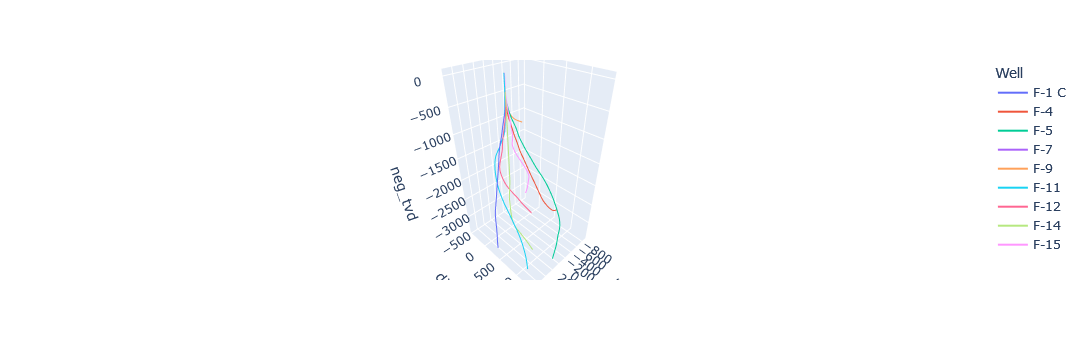

In [70]:
fig = px.line_3d(df_all_wells, 'dispns', 'dispew', 'neg_tvd', "Well")
fig.show()

# Plot well F-14

In [71]:
df_all_wells[df_all_wells['Well']=='F-14']

,azi,incl,md,tvd,dispns,dispew,Well,neg_tvd
687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,F-14,-0.000000
688,0.000000,0.000000,145.899994,145.899994,0.000000,0.000000,F-14,-145.899994
689,0.094597,0.003142,155.089996,155.089981,0.014371,0.001364,F-14,-155.089981
690,0.659385,0.005760,195.440002,195.439595,0.169310,0.078538,F-14,-195.439595
691,1.016131,0.010647,235.800003,235.798224,0.374322,0.332376,F-14,-235.798224
...,...,...,...,...,...,...,...,...
776,1.641482,0.849103,3638.070068,3086.326121,319.865900,891.305938,F-14,-3086.326121
777,1.634501,0.867254,3678.389893,3112.687602,317.818312,921.744721,F-14,-3112.687602
778,1.637119,0.875632,3718.840088,3138.726257,315.807109,952.634067,F-14,-3138.726257
779,1.636072,0.877202,3729.860107,3145.778062,315.250306,961.084086,F-14,-3145.778062


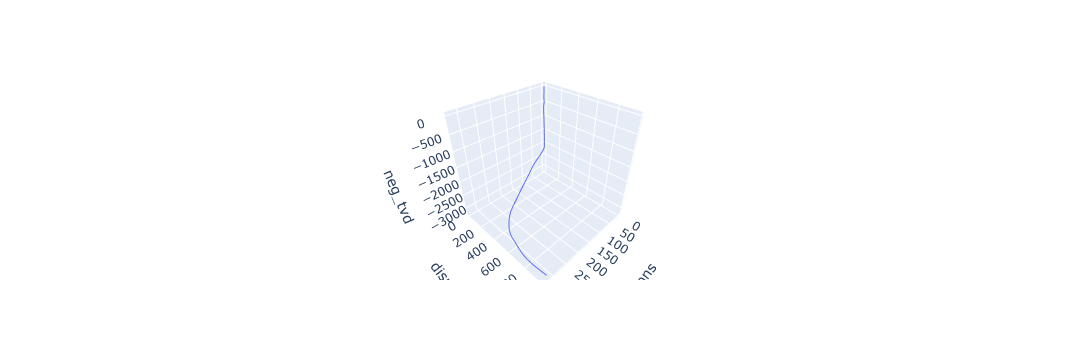

In [72]:
fig_14 = px.line_3d(df_all_wells[df_all_wells['Well']=='F-14'], 'dispns', 'dispew', 'neg_tvd')
fig_14.show()

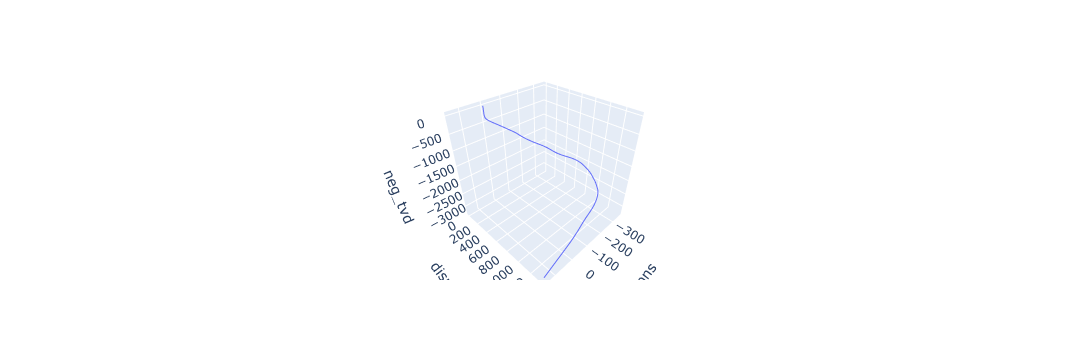

In [73]:
fig_5 = px.line_3d(df_all_wells[df_all_wells['Well']=='F-5'], 'dispns', 'dispew', 'neg_tvd')
fig_5.show()

# Output

Conver xml files to csv files

In [74]:
wells = ['F-1 C',
        'F-4',
        'F-5',
        'F-7',
        'F-9',
        'F-11',
        'F-12',
        'F-14',
        'F-15']

preffix = "Data/output/"
suffix = ".csv"

for well in wells:
    df = df_all_wells[df_all_wells['Well']==well]
    df.to_csv(preffix + well + suffix, index=False)

# EDA (EXploratory Data Analysis)

In [ ]:
corr = df_all_wells.corr()

fig, ax1 = plt.subplots(figsize=(20,8))
sns.heatmap(data=corr, cmap='RdYlGn', annot=True, linewidths=0.01, linecolor='black', square=True, ax=ax1)

## Plots for Categorical Variables

In [ ]:
sns.boxplot(data=df_all_wells, x='Well', y='md')

In [ ]:
sns.barplot(data=df_all_wells, x='Well', y='tvd')

In [ ]:
columns = ['azi', 'incl', 'md', 'tvd', 'dispns', 'dispew']
fig, ax = plt.subplots(len(columns), 1, figsize=(8,20))

for col, axes in zip(columns, ax):
    sns.boxplot(data=df_all_wells, x='Well', y=col, ax=axes)
    plt.tight_layout()

## Plots for Numeric Variables

In [ ]:
sns.displot(data=df_all_wells, x='tvd', hue='Well')

In [ ]:
sns.displot(data=df_all_wells, x='tvd', kind='kde')